## FRAUD DETECTION: SUPERVISED MACHINE LEARNING PROJECT

Regulatory bodies, financial institutions, and investment firms are frequently engaged in the surveillance of potential instances of money laundering. They are responsible for identifying and notifying one another about any suspicious activities. 
Machine learning algorithms can be trained on datasets from banks containing transactions associated with criminal behavior. These models can assist in uncovering covert connections between the movement of funds and illegal activities such as money laundering. 
Implementing such systems can reduce the burden on smaller and medium-sized banks involved in monitoring activities. Machine learning solutions - similar to the ones found below in this project - have successfully detected 99.6 percent of money laundering transactions, and thus, significantly decreased the number of reported transactions from 30 to 1 percent.

### PROBLEM DEFINITION: 
Given our bank data, can we create a supervised machine learning model to accurately predict whether a transaction is fraudulent or not?

### APPROACH TO SOLVING THE PROBLEM:

For the task of predicting whether a transaction is fraudulent or not, several supervised machine learning algorithms can be suitable. The choice of the most appropriate model depends on the specific characteristics of our fraud transactions dataset and the trade-offs we are willing to make between model complexity, interpretability, and performance. Given that our data is labelled, and that our aim is to predict whether a transaction is fraudulent or not, our problem can be categorised as a "Classification" problem, and our model would have to be a "Supervised" one.

Below are two machine learning models that are supervised and are commonly used algorithms for binary classification tasks. They are, therefore, well-suited to our database and to our problem:

1. **Logistic Regression**: This algorithm is widely used for binary classification. It models the relationship between the features and the probability of the target class using a logistic function. Logistic regression is relatively simple and interpretable, making it a good choice for understanding the impact of individual features in our transaction fraud dataset.

2. **Decision Trees**: Decision trees provide a tree-like model of decisions and their potential consequences. They can handle both numerical and categorical data and are known for their interpretability.

### PROJECT PLAN:

1. Import Libraries
2. Upload Data
3. Explore Data
4. Prepare Data for Machine Learning
5. Create & Evaluate the 1st Supervised Machine Learning Model: Logistic Regression
6. Create & Evaluate the 2nd Supervised Machine Learning Model: Decision Tree Classifier

### DATA DICTIONARY

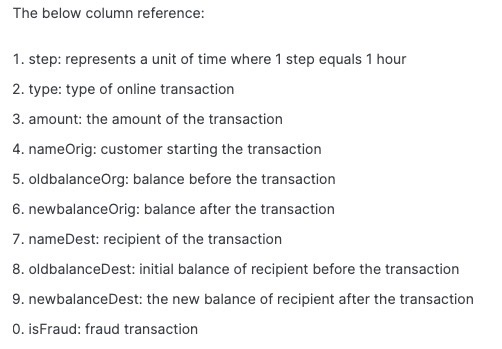

In [101]:
from IPython.display import Image
Image("Fraud.jpeg")

### 1. Import Libraries

In [102]:
# Standard Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# For plots
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido 
import seaborn as sns

# Supervised Machine Learning Models (Classification) from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### 2. Load Data

In [104]:
# Upload dataset
data = pd.read_csv('fraud-detection.csv')


### 3. Explore Data

In [ ]:
# Check head
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Check shape
data.shape

(6362620, 11)

In [ ]:
# Check statistical values
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Check for missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# Check for duplicateß
data.duplicated().sum()

0

In [ ]:
# Check Transaction Types
print(data['type'].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


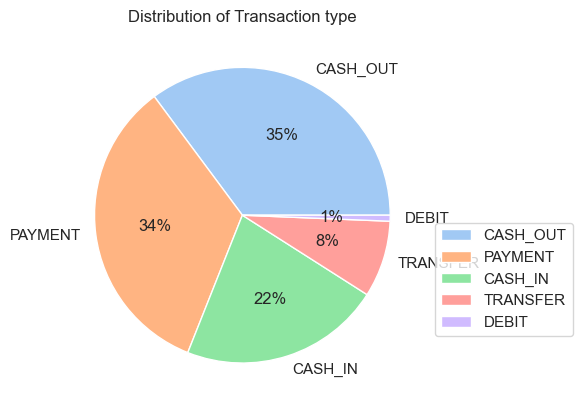

In [ ]:
Type=data['type'].value_counts()
data=Type.values
labels=Type.index
colors=sns.color_palette('pastel')[0:8]
plt.pie(data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title('Distribution of Transaction type')
plt.legend(labels,loc='best',bbox_to_anchor=(1,0.5))
plt.show()


In [109]:
# Check number of fraud transactions in relation to type of transaction
# See which transaction type dominates in list of fradulent transactions

cross_tab_result = pd.crosstab(index=data.type,columns=data.isFraud)
cross_tab_result

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [110]:
cross_tab_result[1]

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: 1, dtype: int64

* The cross-tab function above shows that TRANSFER & CASH_OUT are the fraudsters' preferred type of transaction.

<Axes: xlabel='type'>

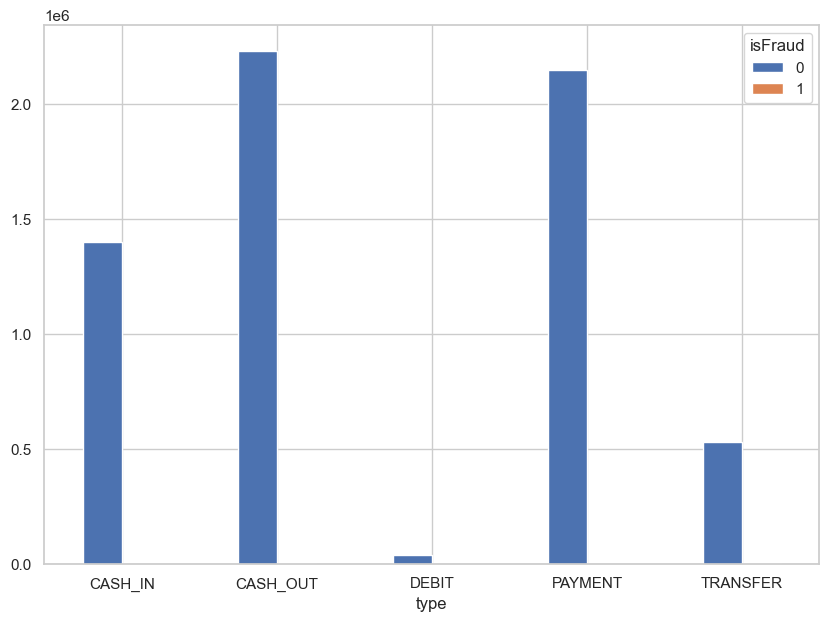

In [114]:
# # The cross-tab function above shows that TRANSFER & CASH_OUT are the fraudsters' preferred type of transaction.

# I will now plot relationship between transaction type and fraud below
cross_tab_result.plot.bar(figsize=(10,7), rot=0)

In [105]:
# Create heatmap to check for correlations
correlation_1 = data.corr(method='pearson', min_periods=1, numeric_only=True)
correlation_1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

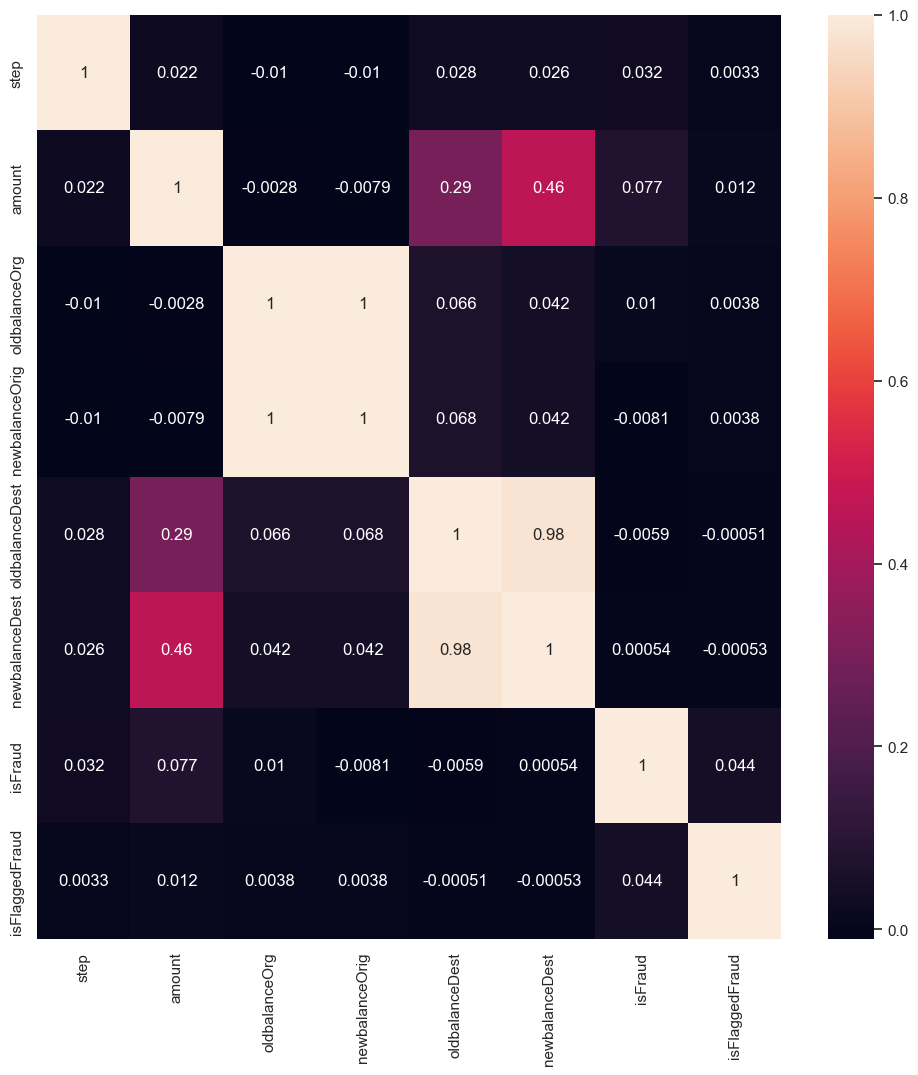

In [108]:
# Visulaisating correlation by plotting heat map in seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_1, annot=True)

### 4. Prepare Data

* The transaction 'type' column is data type "Object". During the exploration stage, it had a strong correlation with fraduluent transactions, so it will need to be kept, but will need to be transformed into numerical values.
* The Label Encoder method of transforming categorical values into numerical ones is chosen here for its simplicity (the other option would've been to use One Hot Encoder, but that would have added further dimensions to a dataset that is already very large. To avoid this, I have chosen the Label Encoder Method isntead).

In [ ]:
# Transform categorical columns into numerical
labelencoder = LabelEncoder()
data['type'] = labelencoder.fit_transform(data['type'])
print(data['type'])

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


* Will drop columns that have no bearing on whether a transaction is fraudulent or not. For example, the 'step', 'nameOrig', and 'nameDest'.
* There's a strong correlation between some types of transactions (in the 'type' column) and whether that transaction is fraudulent, so this is a column I will definitely not drop.
* An account's starting balance, and balance after the transfer are also irrelevant since fradulent transactions can take place regardless of account balances.
* I have also removed the columns with the names of the customer starting the transaction and the one receiving it to avoid any statistical errors resulting from bias.
* Finally, I have removed the column 'isFlaggedFraud' since a transaction's being flagged as fraud doesn't necessarily mean it is actually a fraudulent transaction, nor vice versa.

In [ ]:
data.drop(columns=['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [ ]:
data.shape

(6362620, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   isFraud         int64  
dtypes: float64(3), int64(2)
memory usage: 242.7 MB


In [ ]:
x = data.drop("isFraud", axis=1)
y = data["isFraud"]

In [ ]:
# # Set random seed
np.random.seed(42)

# Splitting dataset into training & test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

### 5. Build & Evaluate Logistic Regression ML Model

#### 5.1. Build Model

In [ ]:
# Fitting LR model to data
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

#### 5.2. Logistic Regression Model's Accuracy Score

In [ ]:
# Evaluating accuracy of model's performance on training data set (x)
lr_score = log_reg.score(x_test, y_test)
lr_score

0.9994766306961598

In [ ]:
# Making predictions via LR model
y_pred = log_reg.predict(x_test)

#### 5.3. Evaluating Model via Confusion Matrix

In [ ]:
# Confusion Matrix for LR model
lr_conf_mat = confusion_matrix(y_test, y_pred)
lr_conf_mat

array([[1270271,     633],
       [     33,    1587]])

In [ ]:
# Turning LR model's predictions into dataframe & comparing the actual values with the model's predicted values
lr_pred = pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

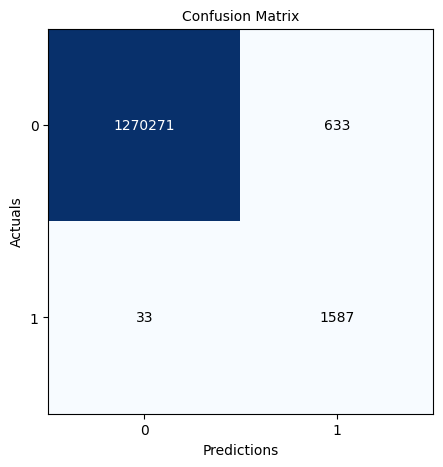

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=lr_conf_mat, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

#### 5.4. Evaluating Model via Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.71      0.98      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.86      0.99      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



### 6. Build & Evaluate Decision Tree Classifier ML Model

#### 6.1. Build Decision Tree Classifier Model

In [ ]:
# Fitting DTC model to data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train) 

DecisionTreeClassifier()

#### 6.2. Decision Tree Classifier Model's Accuracy Score

In [ ]:
# Evaluating accuracy of model's performance on training data set (x)
dtc_score = decision_tree.score(x_test, y_test)
dtc_score

0.9997092392756443

In [ ]:
# Making predictions via DR model
y_pred_dtc = decision_tree.predict(x_test)

#### 6.3. Evaluating Model via Confusion Matrix

In [ ]:
dtc_conf_mat = confusion_matrix(y_test, y_pred_dtc)
dtc_conf_mat

array([[1270726,     178],
       [    192,    1428]])

In [ ]:
# Turning LR model's predictions into dataframe & comparing the actual values with the model's predicted values
dtc_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred_dtc})

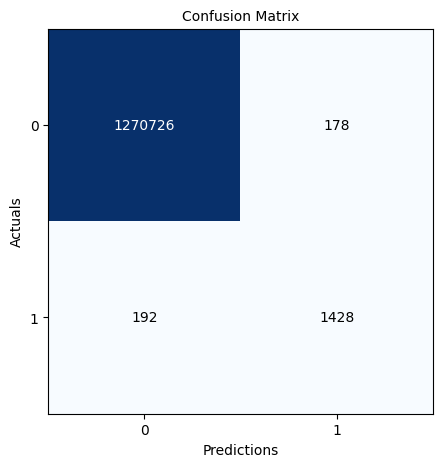

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=dtc_conf_mat, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

#### 6.4. Evaluating Model via Classification Report

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



### CONCLUSION

The objective of this project was to create a machine learning model to accurately predict whether a transaction is fraudulent or not.

The dataset selected was the *Online Payments Fraud Detection Dataset* from Kaggle: <https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset>

This is a dataset of bank transactions which have been classified as fraudulent or not.
The size of the dataset is: 6,362,620 rows and 11 columns.

To achieve the project's objective, we followed the steps below:

1. Started with some exploration of the data – the dataset's features, their distributions, etc. 
2. We then prepared the dataset for machine learning - more specifically, we converted categorical values into numerical ones and dropped irrelavent columns.
3. This was followed by the creation of two supervised machine learning models -- **Logistic Regression** & **Decision Tree Classifier** -- that we had earlier identified were most suited to the project's aims and to the dataset we are working with.
4. Finally, we evaluated the accuracy of each model using three evaluation methods: Accuracy Score, Confusion Matrix & Classification Report.

Our evaluations showed that both models performed well, with the Decision Tree Model preforming slightly better than the Logistic Regression Model. The table below compares their accuracy scores:



In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Decision Tree'],
    'Score': [lr_score, dtc_score]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
0.999709,Decision Tree
0.999477,Logistic Regression


N.B. 
I tried a third supervised machine learning model that is also a classification model called the Random Forest Classifier.

However, when I attempted to build the model, the cell was running for 9 minutes without executing. The dataset has over 6 million entries, so I though that may be causing the problem.

So I decided to try fitting the data to the Random Forest Classifier model on Google Colab. However, that didn't work either: the cell was running for 34:58 minutes on Google Colab without executing.

In the end, I interrupted it and had to accept that this Random Forest Classifier model is not a good fit for this dataset.

Codes for the model I was trying to fit to data:

* I first tried it like this:
> RFR = RandomForestClassifier()\
> RFR.fit(x_train, y_train)

* Then I tried it using specific parameters:
> RFR = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)\
> RFR.fit(x_train, y_train)

But neither would execute in VS Code or Google Colab; they just kept running. This may suggest a mis-match between the countries dataset and the Random Forest Classifier model.